<a href="https://colab.research.google.com/github/sradhass88/A-Project-on-Customer-Churn-Prediction-in-Telecom-using-Machine-learning/blob/main/A_PROJECT_ON_Customer_Churn_Prediction_in_Telecom_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
blastchar_telco_customer_churn_path = kagglehub.dataset_download('blastchar/telco-customer-churn')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# **1. Understanding the Data**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object) # Convert SeniorCitizen column into object type

# Convert the values in the TotalCharges column of a Pandas DataFrame (df) into numeric data type (e.g., float or integer)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
num_cols=[col for col in df.columns if df[col].dtype !='object']
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

# **2. Handling Missing Values**

In [ ]:
# Fill the NaN values with 0

df['TotalCharges'].fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# **3. Univariate Analysis**

**Categorical Columns**

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435

##########################################



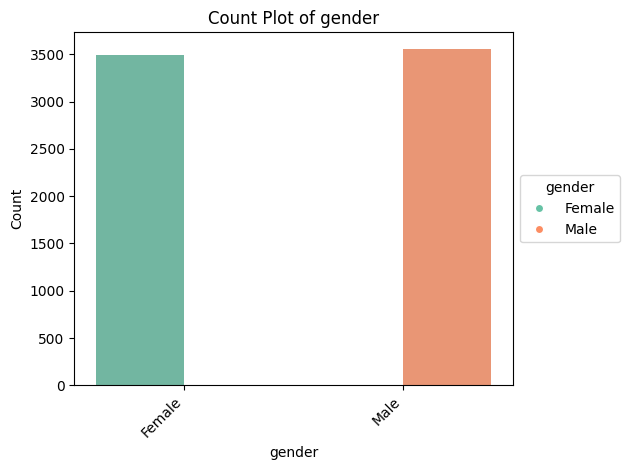

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5901  83.785319
1                       1142  16.214681

##########################################



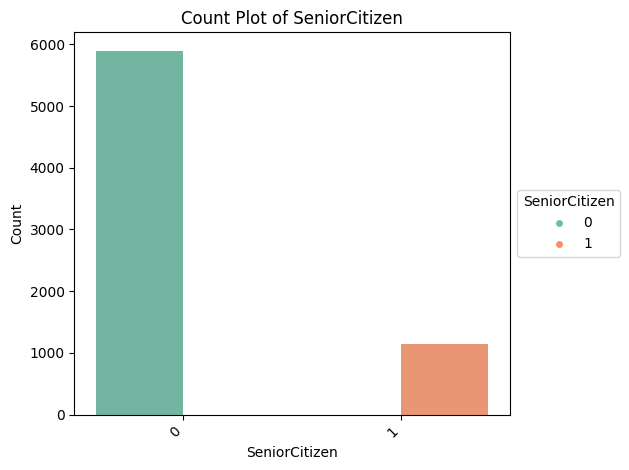

         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328

##########################################



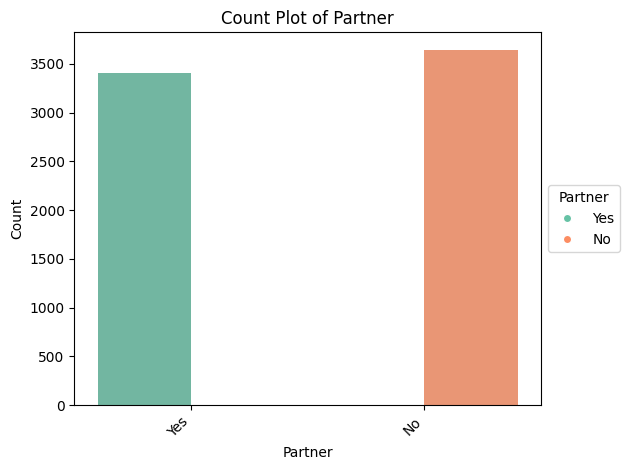

            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824

##########################################



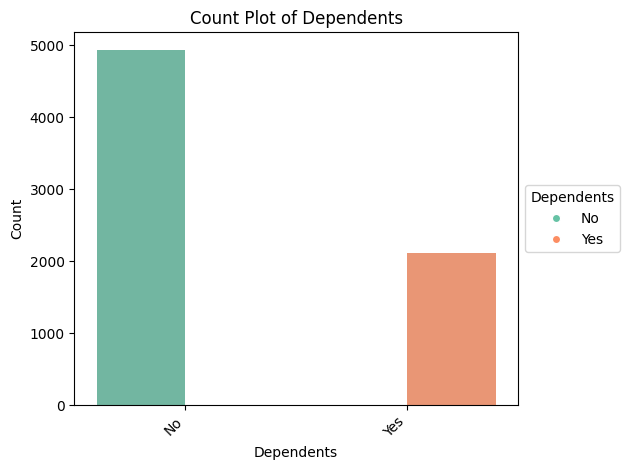

              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374

##########################################



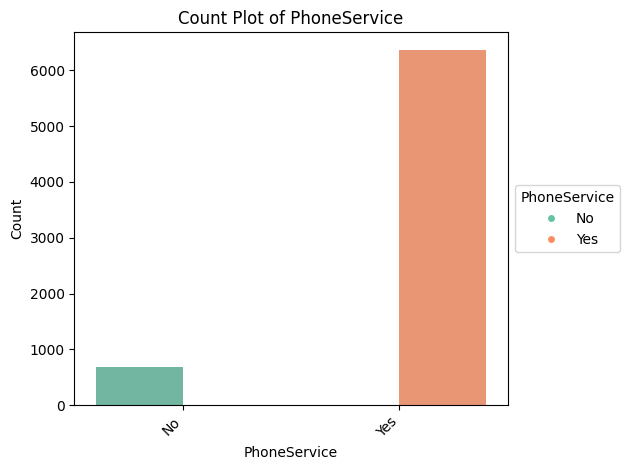

                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374

##########################################



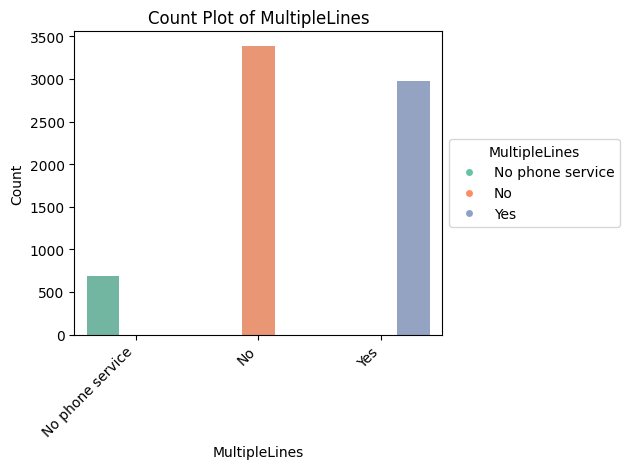

                 InternetService      Ratio
InternetService                            
Fiber optic                 3096  43.958540
DSL                         2421  34.374556
No                          1526  21.666903

##########################################



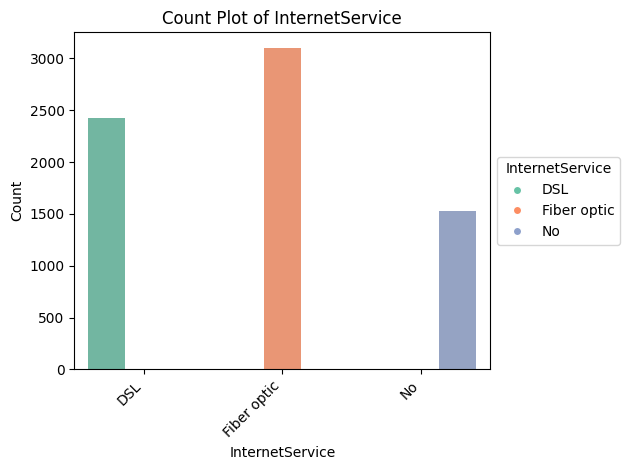

                     OnlineSecurity      Ratio
OnlineSecurity                                
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903

##########################################



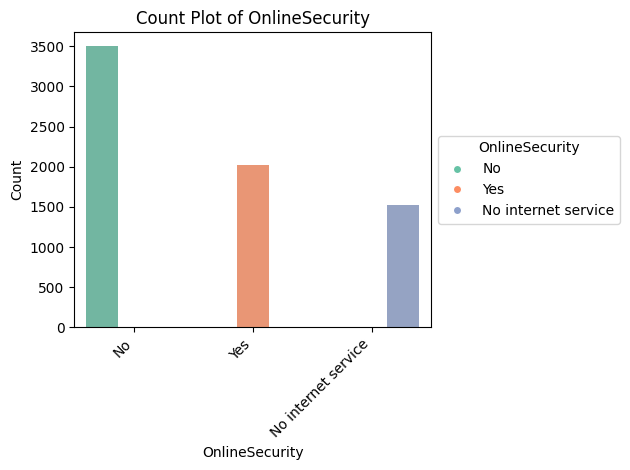

                     OnlineBackup      Ratio
OnlineBackup                                
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903

##########################################



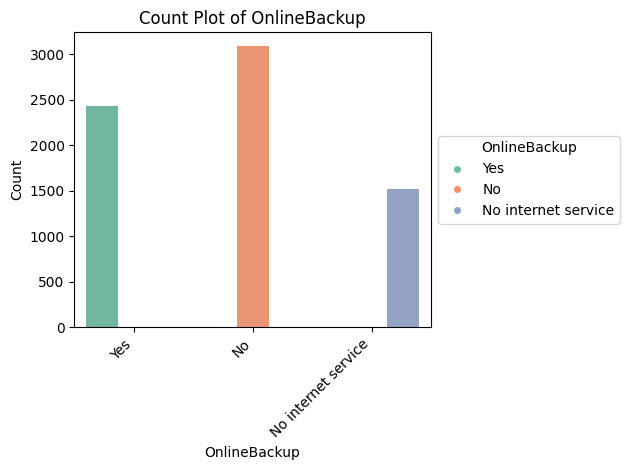

                     DeviceProtection      Ratio
DeviceProtection                                
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903

##########################################



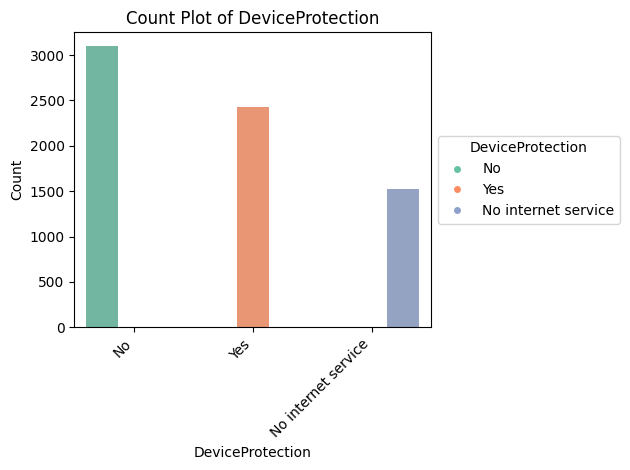

                     TechSupport      Ratio
TechSupport                                
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903

##########################################



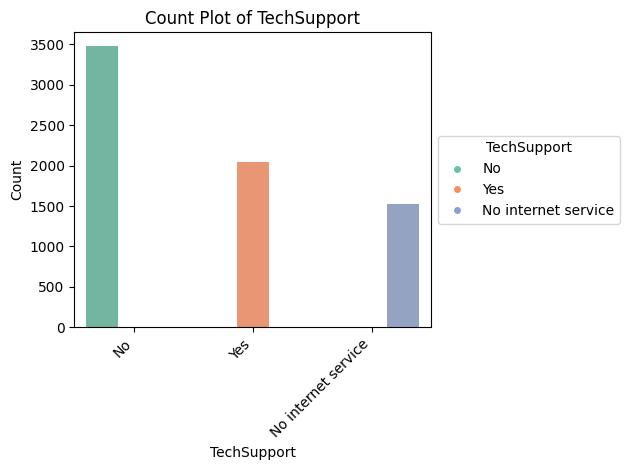

                     StreamingTV      Ratio
StreamingTV                                
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903

##########################################



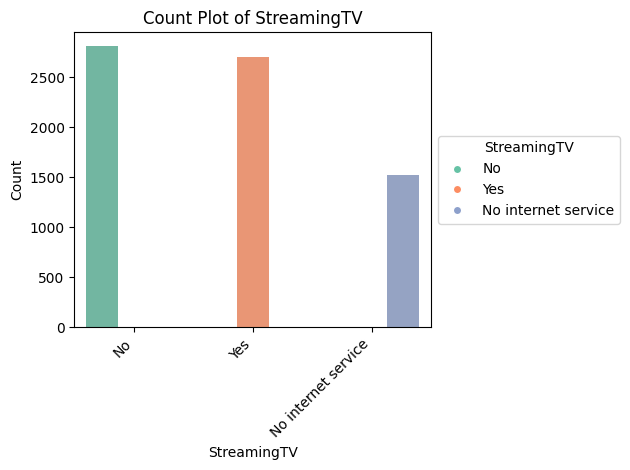

                     StreamingMovies      Ratio
StreamingMovies                                
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903

##########################################



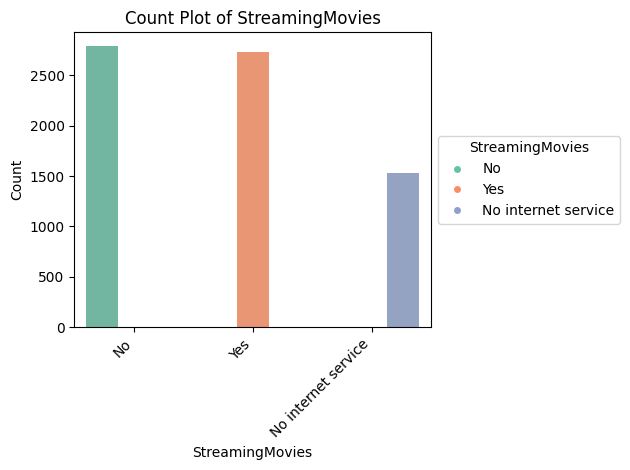

                Contract      Ratio
Contract                           
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383

##########################################



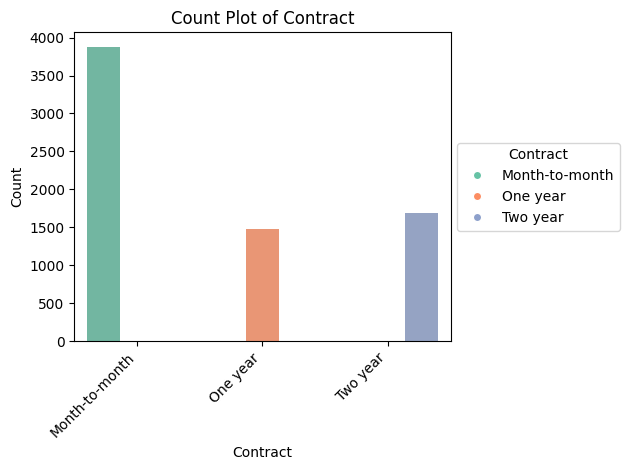

                  PaperlessBilling      Ratio
PaperlessBilling                             
Yes                           4171  59.221922
No                            2872  40.778078

##########################################



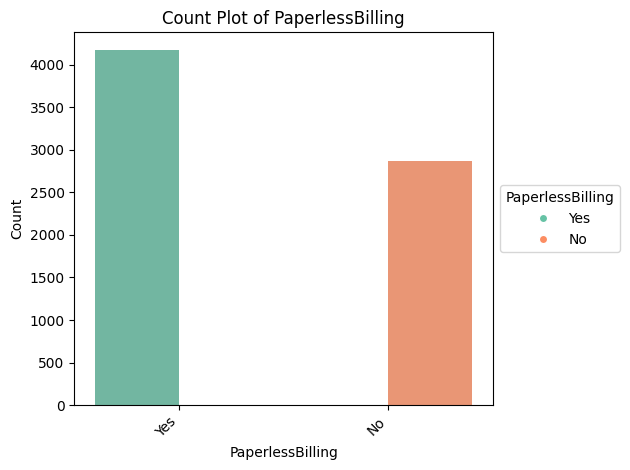

                           PaymentMethod      Ratio
PaymentMethod                                      
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109

##########################################



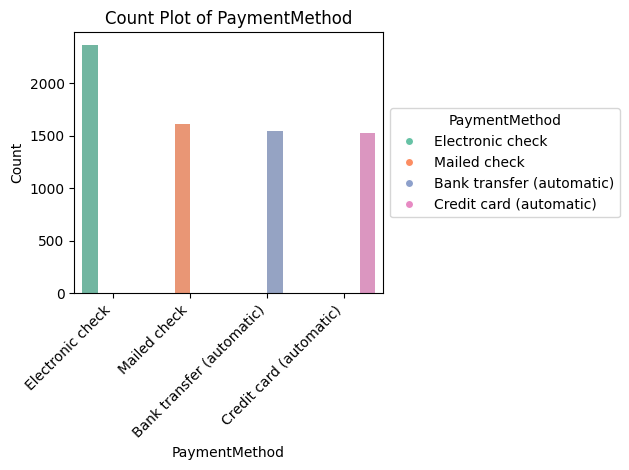

       Churn      Ratio
Churn                  
No      5174  73.463013
Yes     1869  26.536987

##########################################



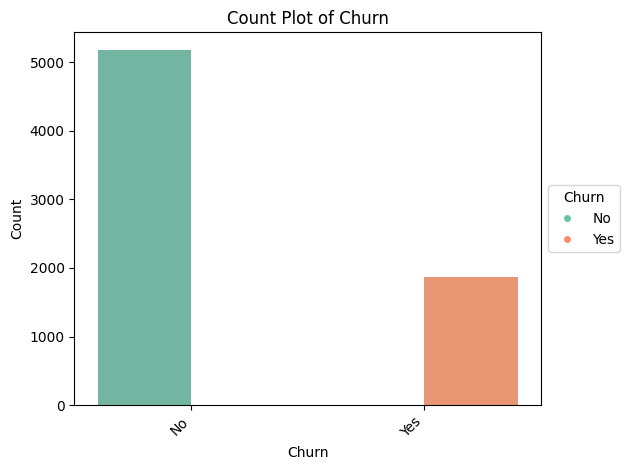

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def cat_summary(dataframe, col_name, plot=False):
    # Print summary table of value counts and their ratios
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("\n##########################################\n")

    # Plot if plot=True
    if plot:
        # Count plot without hue to avoid FutureWarning
        ax = sns.countplot(x=col_name, data=dataframe, palette="Set2", hue=col_name)

        # Set labels and title
        plt.xlabel(col_name)
        plt.ylabel("Count")
        plt.title(f"Count Plot of {col_name}")

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')

        # Manually create the legend
        unique_values = dataframe[col_name].unique()
        handles = [plt.Line2D([0], [0], marker='o', color='w', label=value,
                               markerfacecolor=sns.color_palette("Set2")[i])
                   for i, value in enumerate(unique_values)]

        # Adjust legend position to the right side of the plot
        plt.legend(title=col_name, handles=handles, loc="center left", bbox_to_anchor=(1, 0.5))

        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()

# Assuming cat_cols is a list of categorical columns
for col in cat_cols:
    cat_summary(df, col, plot=True)

**Numerical Columns**


*************** tenure ***************

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


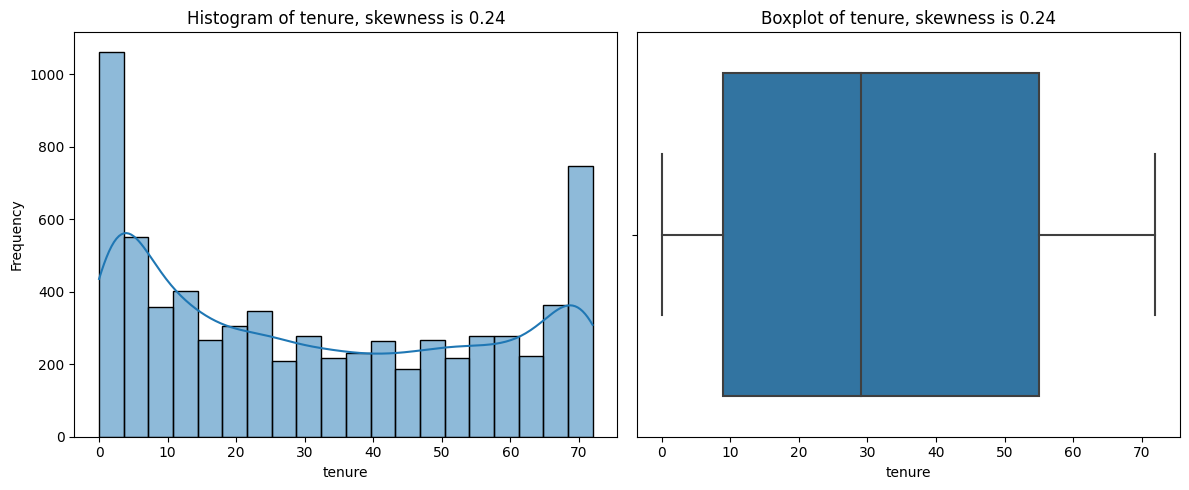


*************** MonthlyCharges ***************

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


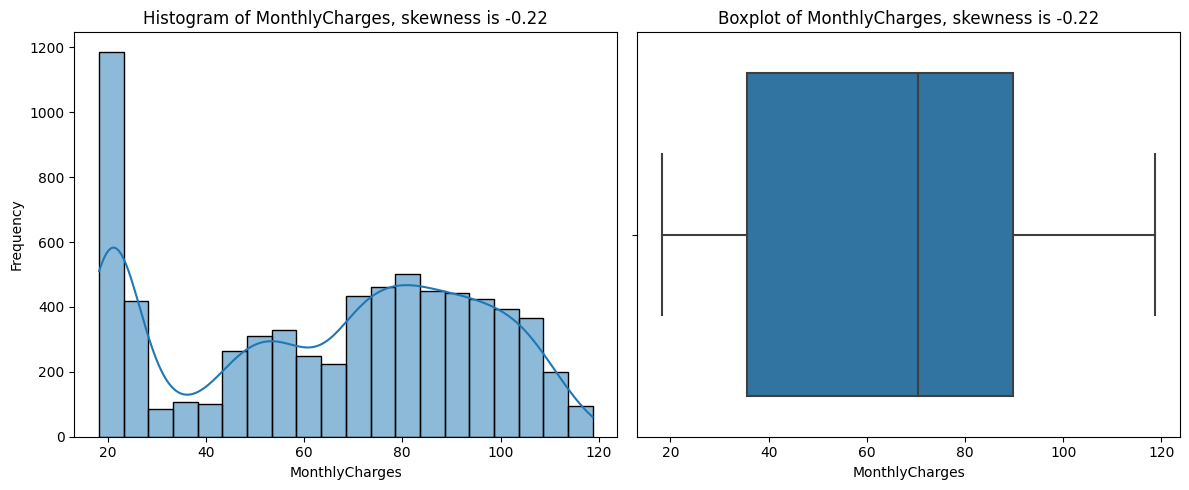


*************** TotalCharges ***************

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


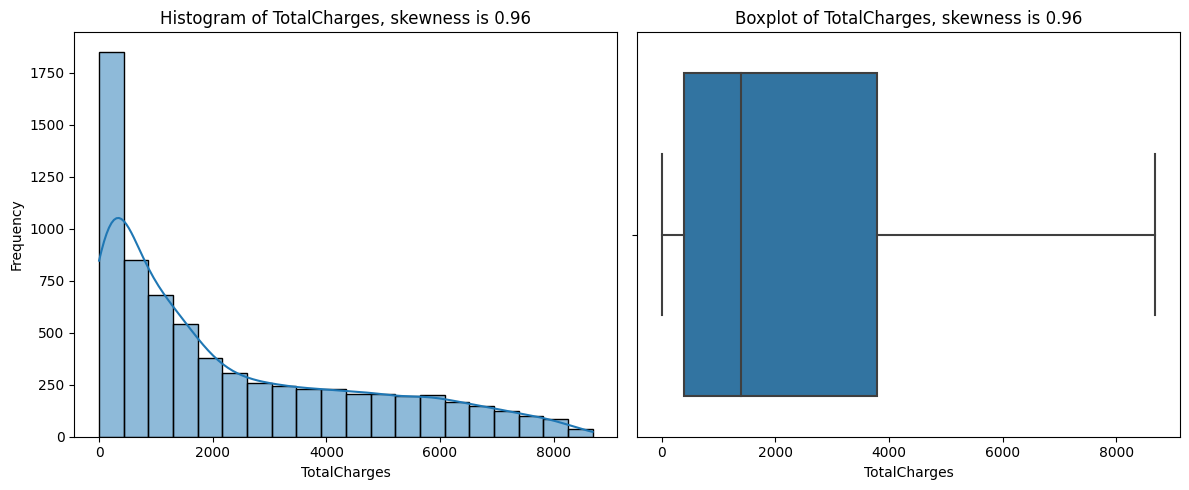

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def num_summary(dataframe, numerical_col):
    print('\n***************', numerical_col, '***************\n')
    print(dataframe[numerical_col].describe())

def univariate_plots(dataframe, numerical_cols):
    for col in numerical_cols:
        # Call num_summary to print statistics
        num_summary(dataframe, col)

        # Create a figure for the histogram
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=20, kde=True)
        plt.title(f'Histogram of {col}, skewness is {round(dataframe[col].skew(), 2)}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataframe[col])
        plt.title(f'Boxplot of {col}, skewness is {round(dataframe[col].skew(), 2)}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

# List of numerical columns to plot
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Generate univariate plots
univariate_plots(df, num_cols)


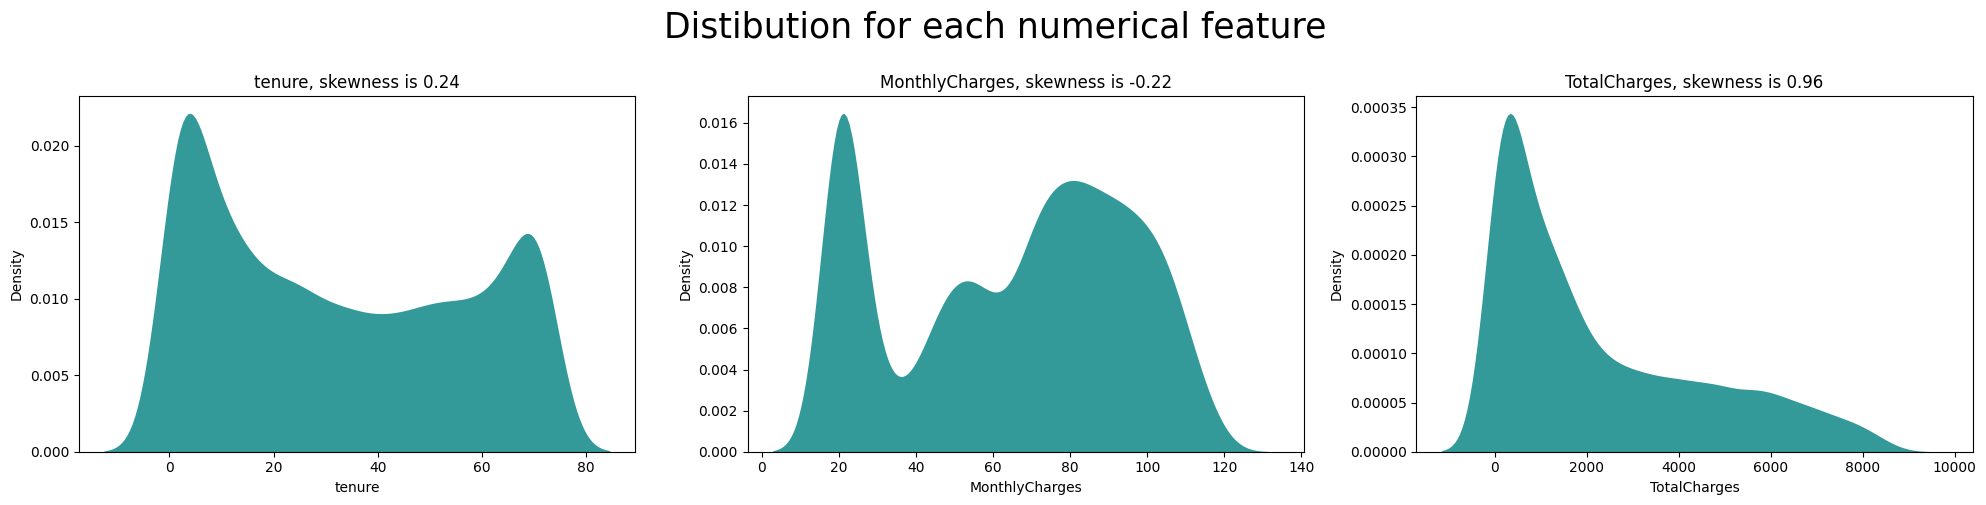

In [ ]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=df, columns_list=num_cols, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

# **4. Bivariate Analysis**

**Categorical Columns**

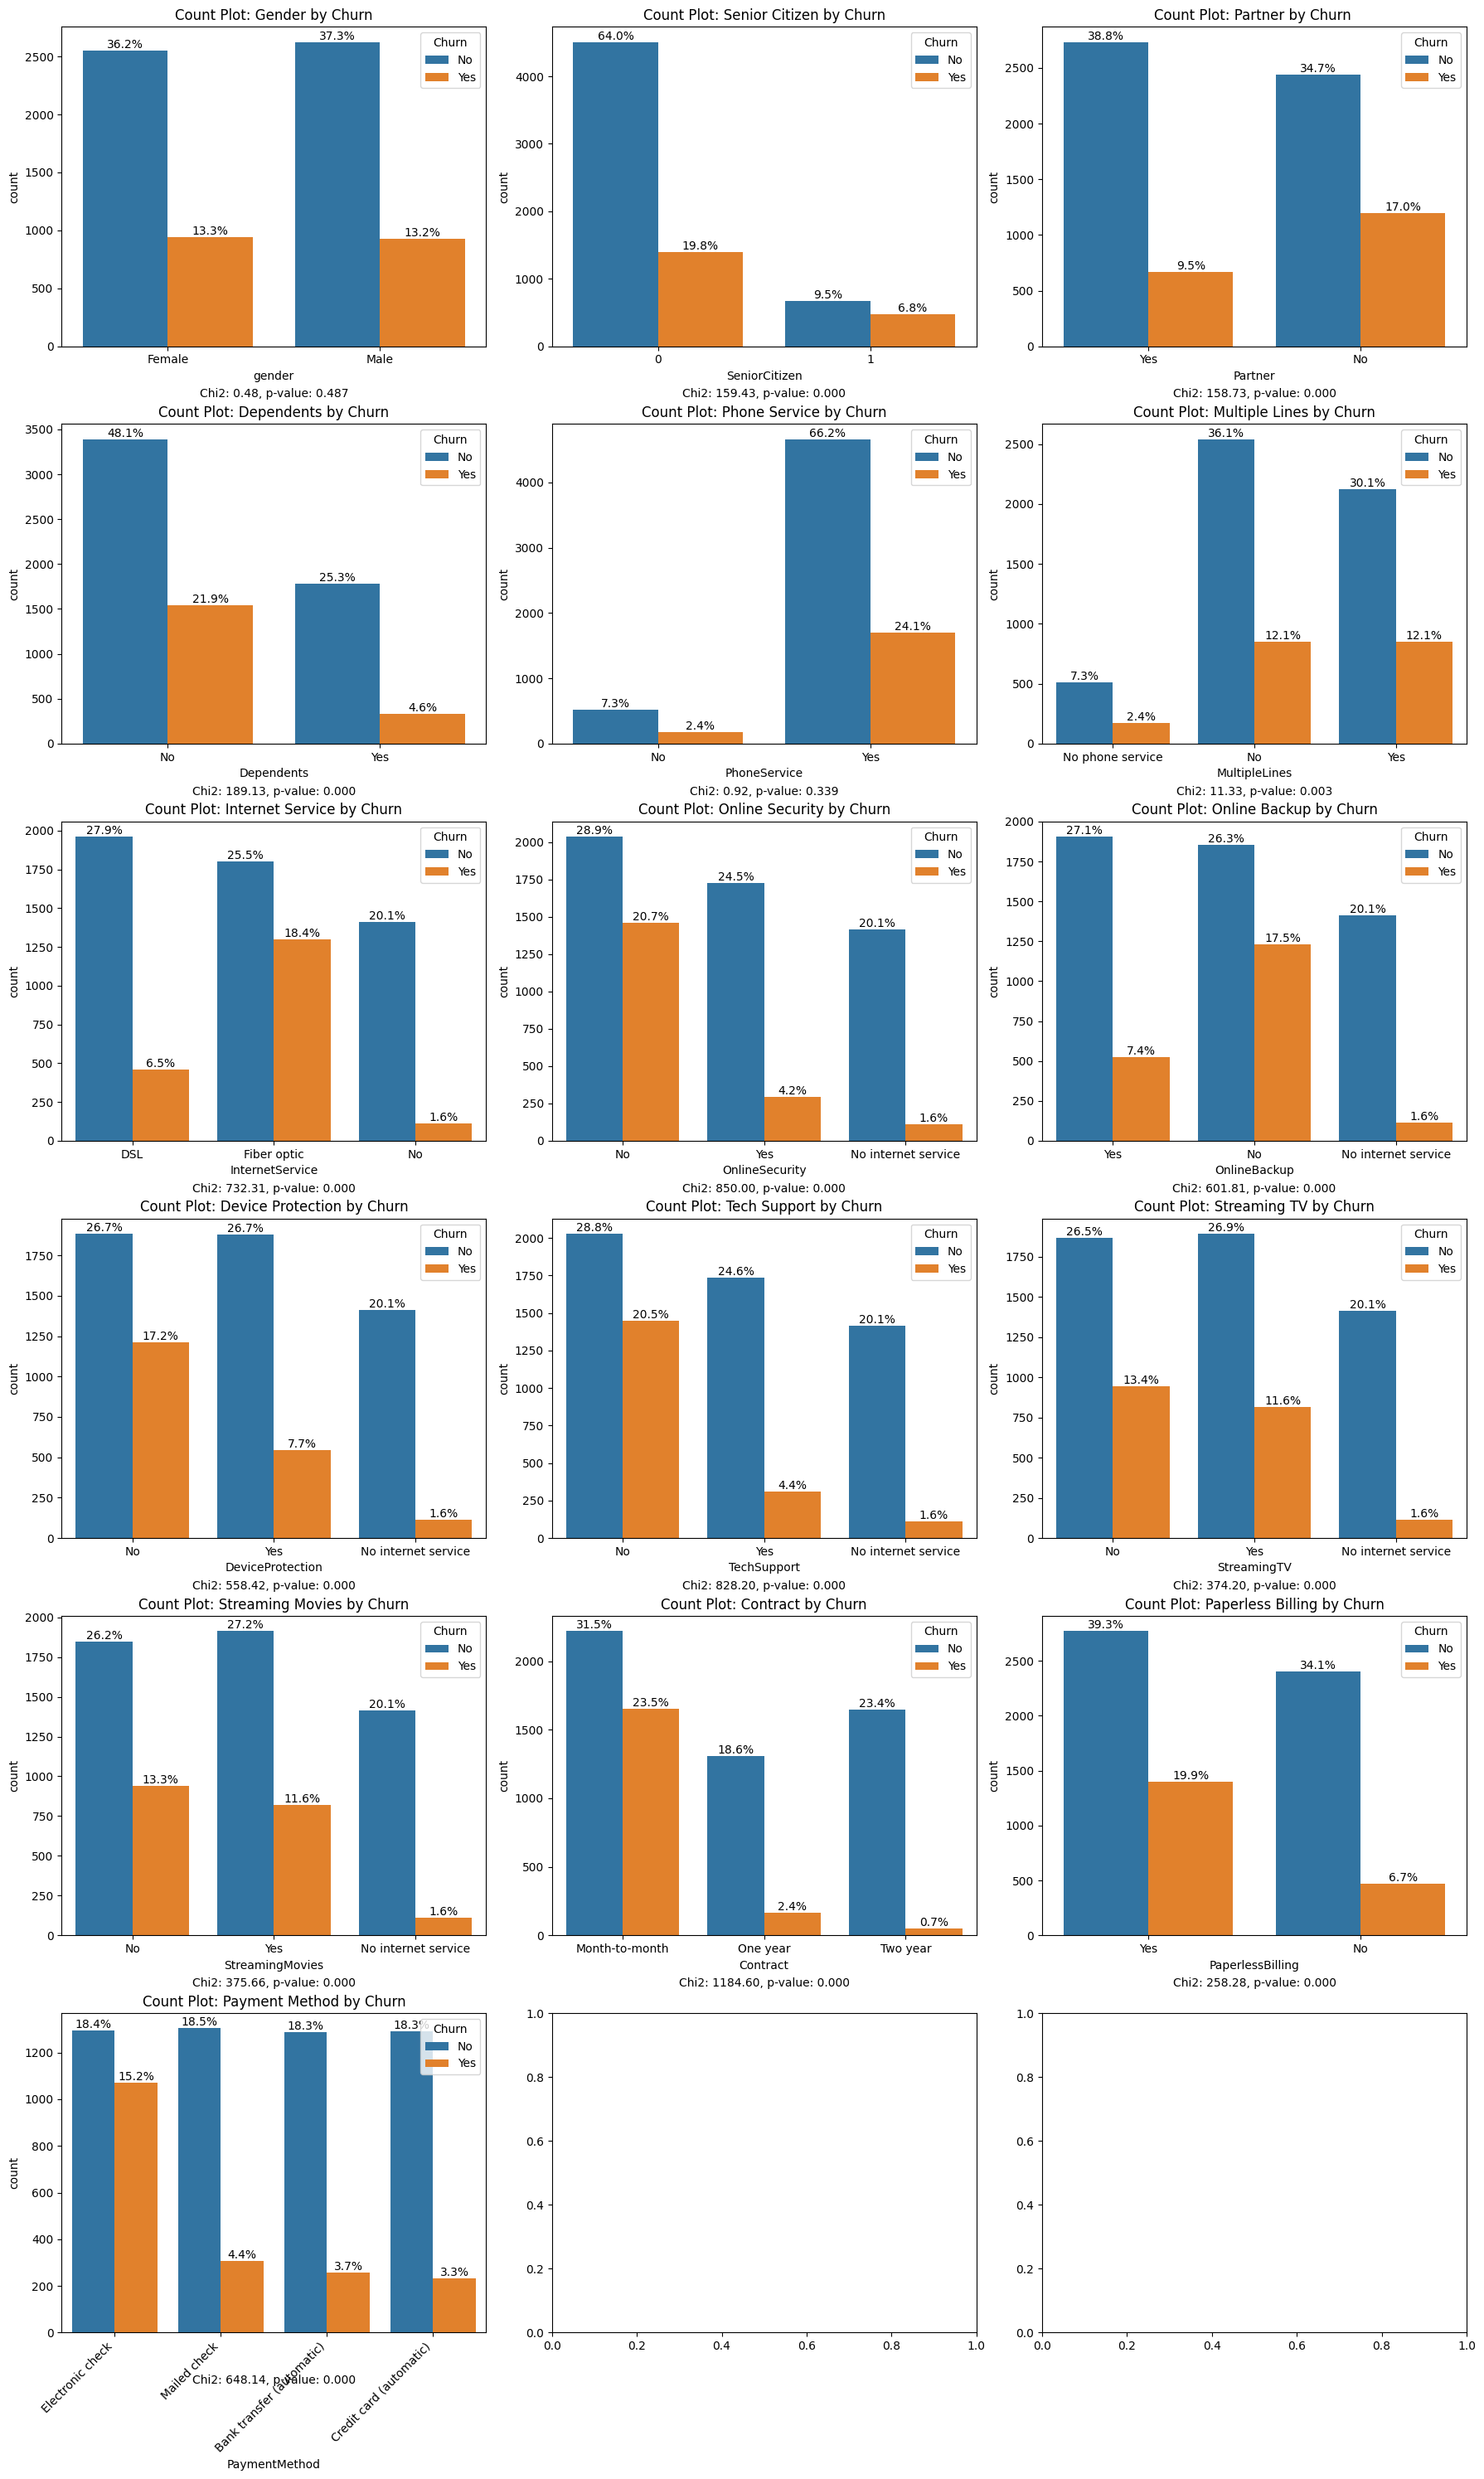

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Function to calculate Chi-Square and p-value
def chi_square_test(dataframe, feature, target):
    contingency_table = pd.crosstab(dataframe[feature], dataframe[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

# List of features to plot
features = [
    ('gender', 'Count Plot: Gender by Churn'),
    ('SeniorCitizen', 'Count Plot: Senior Citizen by Churn'),
    ('Partner', 'Count Plot: Partner by Churn '),
    ('Dependents', 'Count Plot: Dependents by Churn'),
    ('PhoneService', 'Count Plot: Phone Service by Churn'),
    ('MultipleLines', 'Count Plot: Multiple Lines by Churn'),
    ('InternetService', 'Count Plot: Internet Service by Churn'),
    ('OnlineSecurity', 'Count Plot: Online Security by Churn'),
    ('OnlineBackup', 'Count Plot: Online Backup by Churn'),
    ('DeviceProtection', 'Count Plot: Device Protection by Churn'),
    ('TechSupport', 'Count Plot: Tech Support by Churn'),
    ('StreamingTV', 'Count Plot: Streaming TV by Churn'),
    ('StreamingMovies', 'Count Plot: Streaming Movies by Churn'),
    ('Contract', 'Count Plot: Contract by Churn'),
    ('PaperlessBilling', 'Count Plot: Paperless Billing by Churn'),
    ('PaymentMethod', 'Count Plot: Payment Method by Churn'),
]

# Create subplots with enough space
fig, axes = plt.subplots(6, 3, figsize=(18, 30))

# Loop through the features for count plots
for i, (feature, title) in enumerate(features):
    ax = axes[i // 3, i % 3]  # Determine the correct subplot
    sns.countplot(data=df, x=feature, hue='Churn', ax=ax)
    ax.set_title(title)

    # Calculate total counts for percentages
    total = len(df)

    # Add percentage annotations on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height == 0:  # Skip if the bar height is 0 (0.0%)
            continue
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    # Perform Chi-Square test and get results
    chi2, p = chi_square_test(df, feature, 'Churn')
    ax.text(0.5, -0.15, f'Chi2: {chi2:.2f}, p-value: {p:.3f}', ha='center', va='center', transform=ax.transAxes)

    # Use plt.xticks() for proper x-tick label rotation if needed
    if feature == 'PaymentMethod':
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


**Numerical Columns**

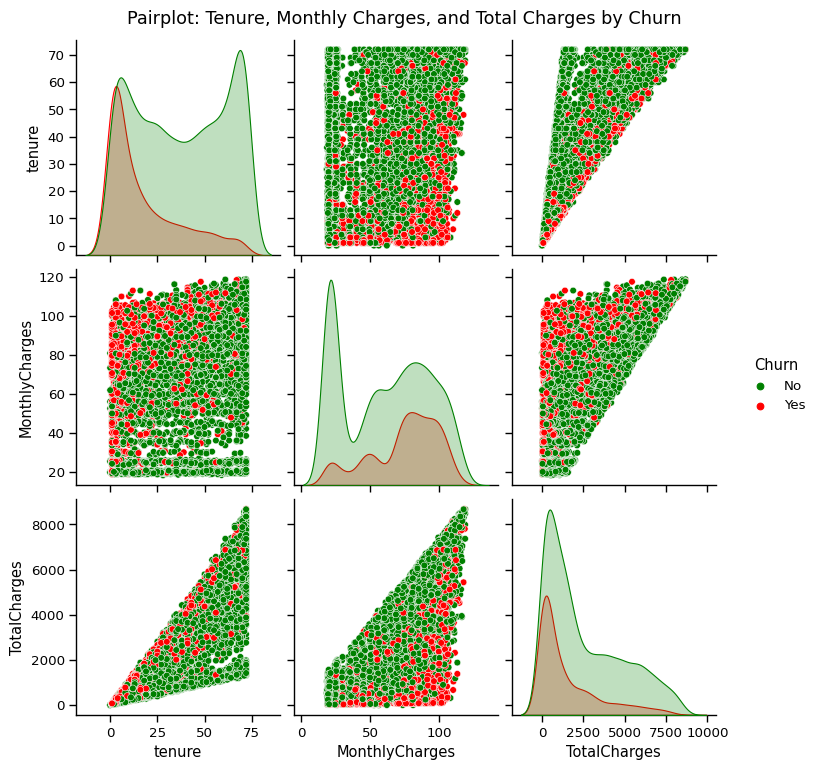

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the selected columns
plot_data = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

# Set the context for the plot
sns.set_context("paper", font_scale=1.1)

# Create pairplot
pair_plot = sns.pairplot(plot_data, hue='Churn', palette={'Yes': 'red', 'No': 'green'})

# Set titles
pair_plot.fig.suptitle('Pairplot: Tenure, Monthly Charges, and Total Charges by Churn', y=1.02)

# Show the plot
plt.show()

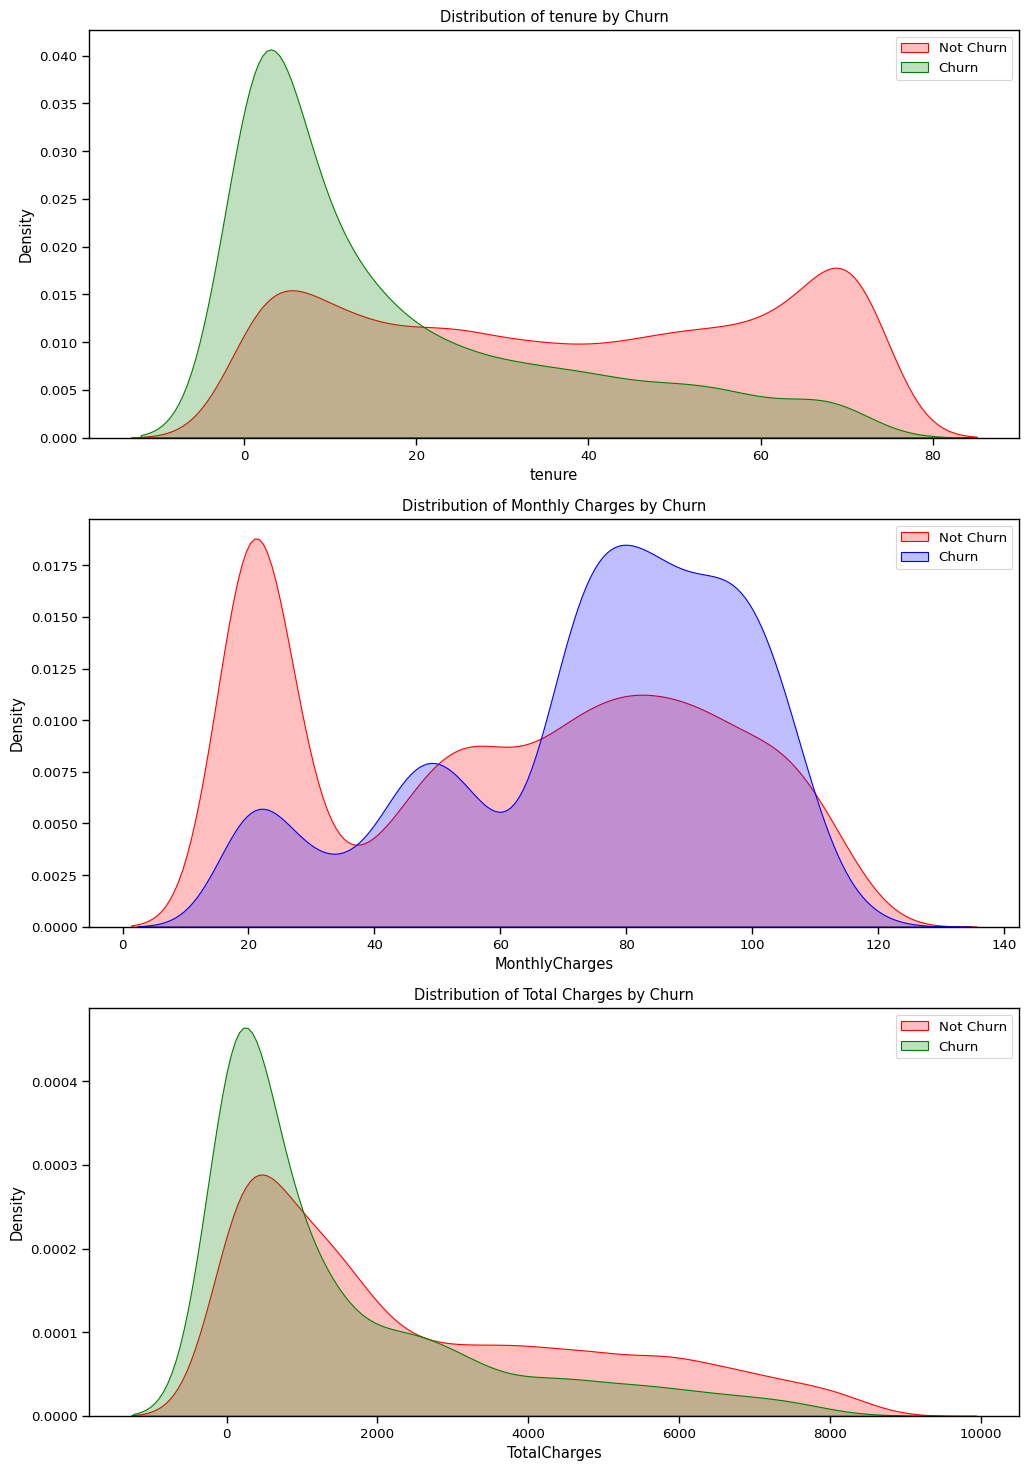

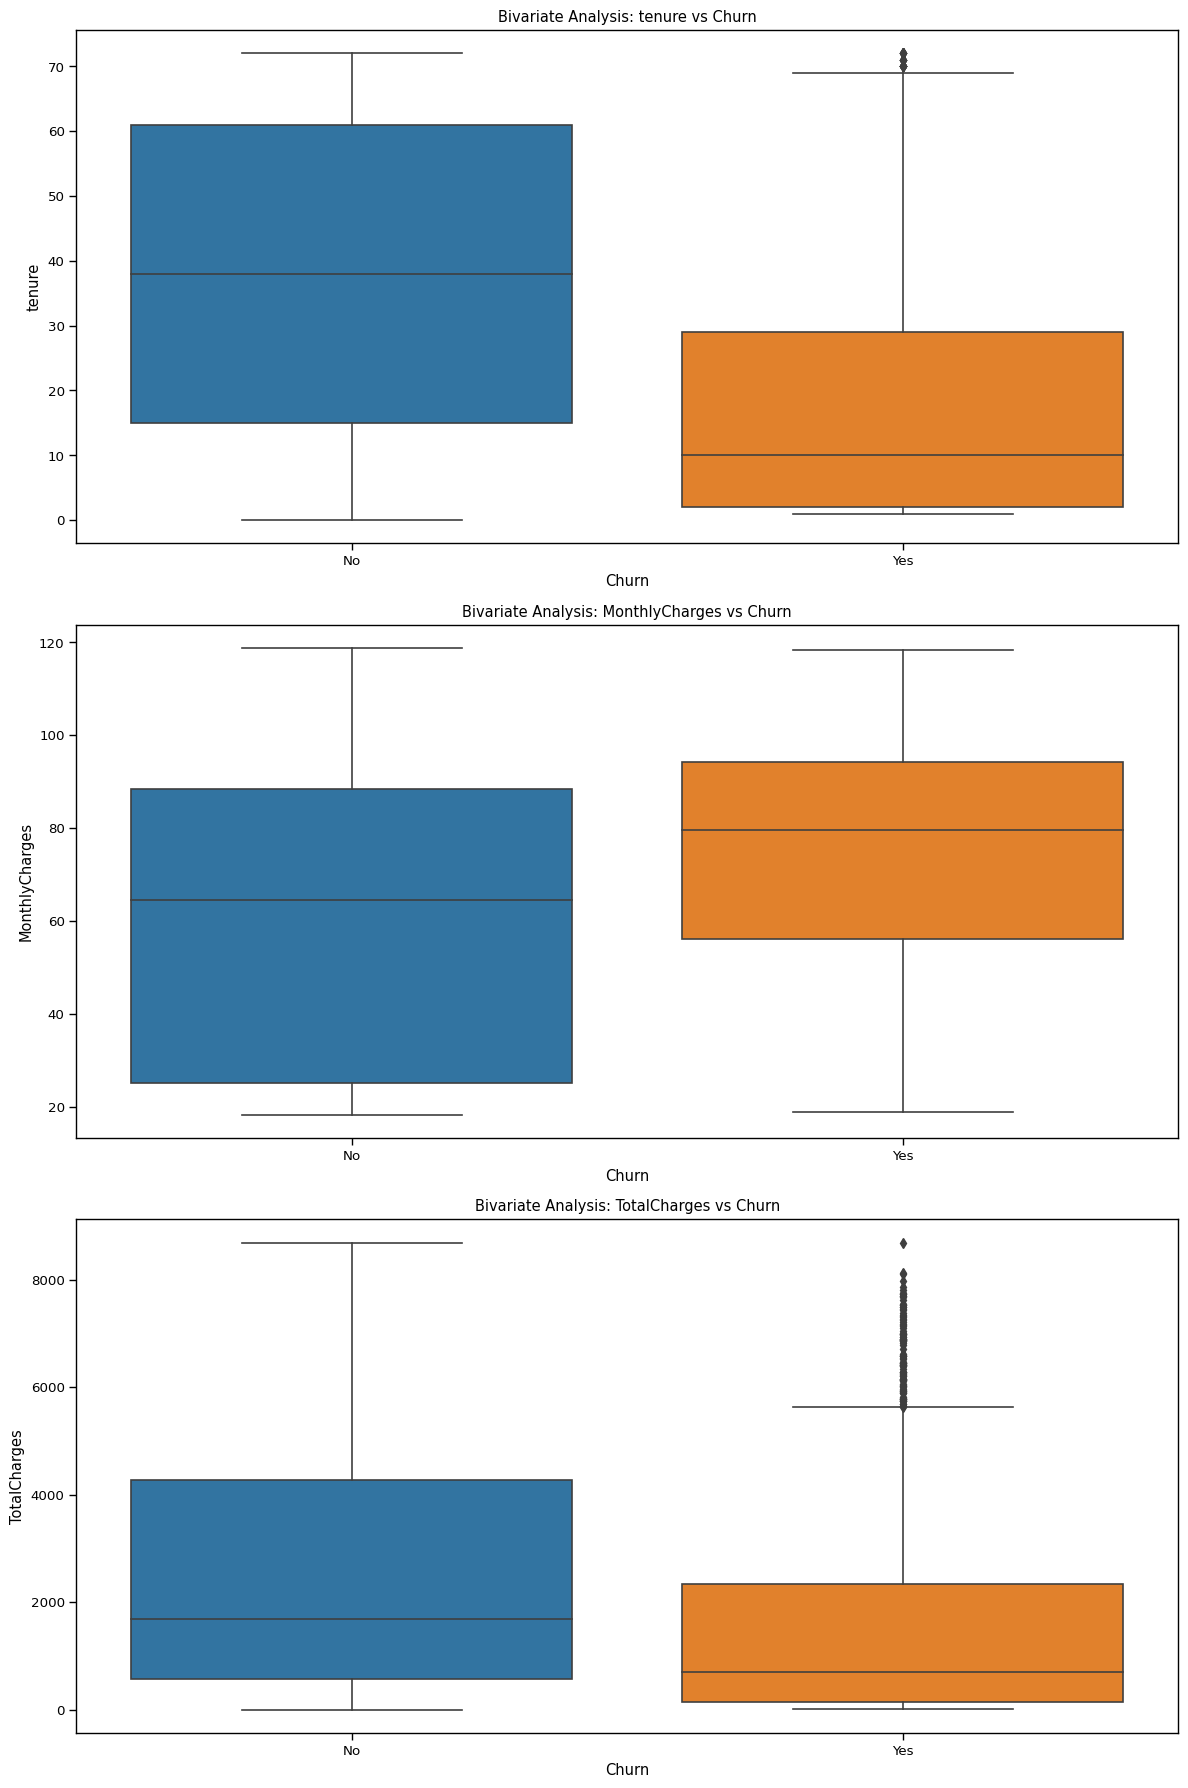

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the context for the plots
sns.set_context("paper", font_scale=1.1)

# List of features for KDE plots
features = [
    ('tenure', 'Red', 'Green', 'Distribution of tenure by Churn'),
    ('MonthlyCharges', 'Red', 'Blue', 'Distribution of Monthly Charges by Churn'),
    ('TotalCharges', 'Red', 'Green', 'Distribution of Total Charges by Churn')
]

# List of numerical columns for box plots
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create subplots with 2 rows for KDE and 3 for box plots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Loop through the features to create KDE plots
for i, (feature, color_no, color_yes, title) in enumerate(features):
    ax = sns.kdeplot(df[feature][df["Churn"] == 'No'], color=color_no, fill=True, ax=axes[i])
    ax = sns.kdeplot(df[feature][df["Churn"] == 'Yes'], ax=ax, color=color_yes, fill=True)

    # Add legend and labels
    ax.legend(["Not Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(feature)
    ax.set_title(title)

# Create box plots for the numerical columns in a new figure
fig2, axes2 = plt.subplots(3, 1, figsize=(12, 18))

# Loop through numerical columns to create box plots
for i, col in enumerate(num_cols):
    ax = sns.boxplot(x='Churn', y=col, data=df, ax=axes2[i])
    ax.set_title(f'Bivariate Analysis: {col} vs Churn')

# Adjust layout for both figures
plt.tight_layout()
plt.show()

# **5. Dealing with Outliers**

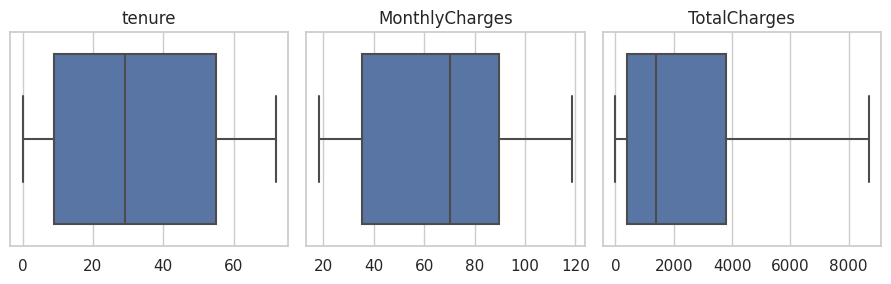

In [ ]:
sns.set(style="whitegrid")

numerical_columns = [col for col in df.columns if df[col].dtype !='object']

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
for col in num_cols:
  print(f"Column: {col}")
  print(f"Minimum: {df[col].min()}")
  print(f"Maximum: {df[col].max()}")
  print("-" * 20)

Column: tenure
Minimum: 0
Maximum: 72
--------------------
Column: MonthlyCharges
Minimum: 18.25
Maximum: 118.75
--------------------
Column: TotalCharges
Minimum: 0.0
Maximum: 8684.8
--------------------


**Based on the boxplot, there are no data points beyond the whiskers, indicating the absence of outliers in the dataset. Although the data is right-skewed, there are no outliers, meaning all values fall within a reasonable range. The skewness reflects the natural distribution of the data, with most values concentrated on the left and a gradual tail on the right, but no extreme points distort the dataset.**

# **6. Feature Engineering**

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Data transformation of columns ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies') by converting 'No Internet Service' to 'No' for consistency and clarity**

In [ ]:
# Columns to apply the transformation
columns_to_update = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace 'No internet service' with 'No' in the specified columns
df[columns_to_update] = df[columns_to_update].replace('No internet service', 'No')

**Data transformation of column MultipleLines by converting 'No phone service' to 'No' for consistency and clarity**

In [ ]:
# Replace 'No phone service' with 'No' in the 'MultipleLines' column
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

**tenure_bin is created by assigning labels to tenure based on the defined bins.**

In [ ]:
# Define the bins and corresponding labels
bins = [-1, 24, 48, 72]
labels = ['New', 'Mid', 'Long']

# Create the tenure_bin column
df['tenure_bin'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)


**ChurnRisk column is created**

In [ ]:
df['ChurnRisk'] = ((df['tenure'] < 12) & (df['MonthlyCharges'] > df['MonthlyCharges'].median())).astype(int)

**Contract_Internet column is created**

In [ ]:
# Create interaction feature between Contract type and Internet service type
df['Contract_Internet'] = ((df['Contract'] == 'Month-to-month') & (df['InternetService'] == 'Fiber optic')).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             7043 non-null   object  
 1   SeniorCitizen      7043 non-null   object  
 2   Partner            7043 non-null   object  
 3   Dependents         7043 non-null   object  
 4   tenure             7043 non-null   int64   
 5   PhoneService       7043 non-null   object  
 6   MultipleLines      7043 non-null   object  
 7   InternetService    7043 non-null   object  
 8   OnlineSecurity     7043 non-null   object  
 9   OnlineBackup       7043 non-null   object  
 10  DeviceProtection   7043 non-null   object  
 11  TechSupport        7043 non-null   object  
 12  StreamingTV        7043 non-null   object  
 13  StreamingMovies    7043 non-null   object  
 14  Contract           7043 non-null   object  
 15  PaperlessBilling   7043 non-null   object  
 16  Paymen

# **7. Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Columns for Label Encoding (binary columns)
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
              'PaperlessBilling', 'Churn', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies','MultipleLines','SeniorCitizen']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the binary columns, checking if they exist in the DataFrame
for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [ ]:
# Columns for One Hot Encoding (nominal columns)
one_hot_cols = ['Contract', 'PaymentMethod', 'InternetService','tenure_bin']

# Initialize the OneHotEncoder
ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(df[one_hot_cols])
ohe_columns = ohe.get_feature_names_out(one_hot_cols)
df = pd.concat([df.drop(columns=one_hot_cols), pd.DataFrame(ohe_result.toarray(), columns=ohe_columns)],axis=1)

# **8. Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
mms1 = MinMaxScaler()
#ss = StandardScaler() # Standardization


df['tenure'] = mms.fit_transform(df[['tenure']])
df['MonthlyCharges'] = mms.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = mms1.fit_transform(df[['TotalCharges']])

# **9. Correlation between Churn and Other features**

Text(0.5, 1.0, 'Correlation w.r.t Outcome')

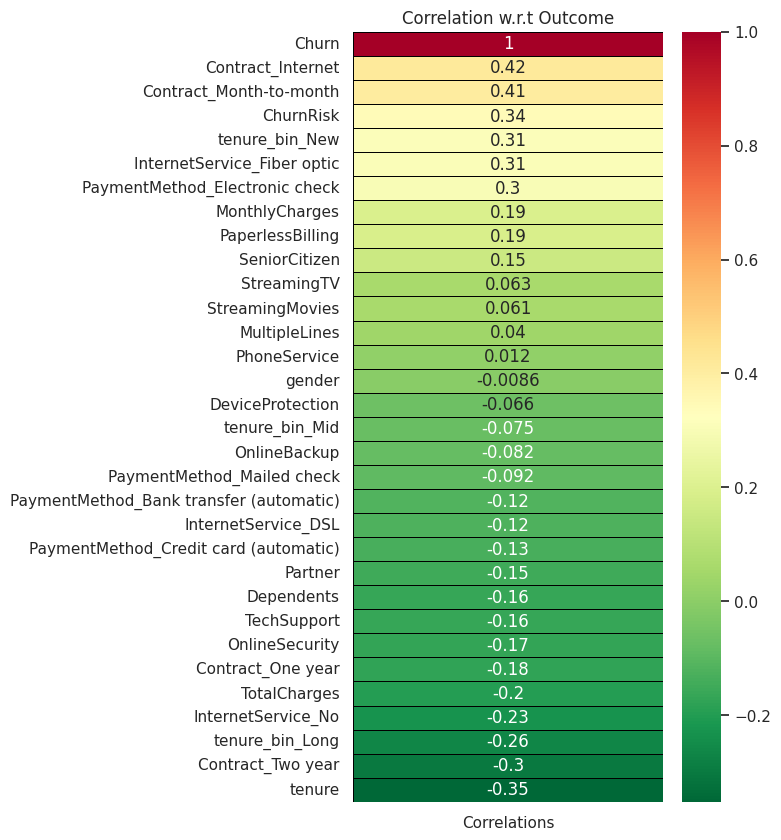

In [ ]:
corr = df.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,10))
sns.heatmap(corr,annot = True,cmap ='RdYlGn_r',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome')

<Axes: >

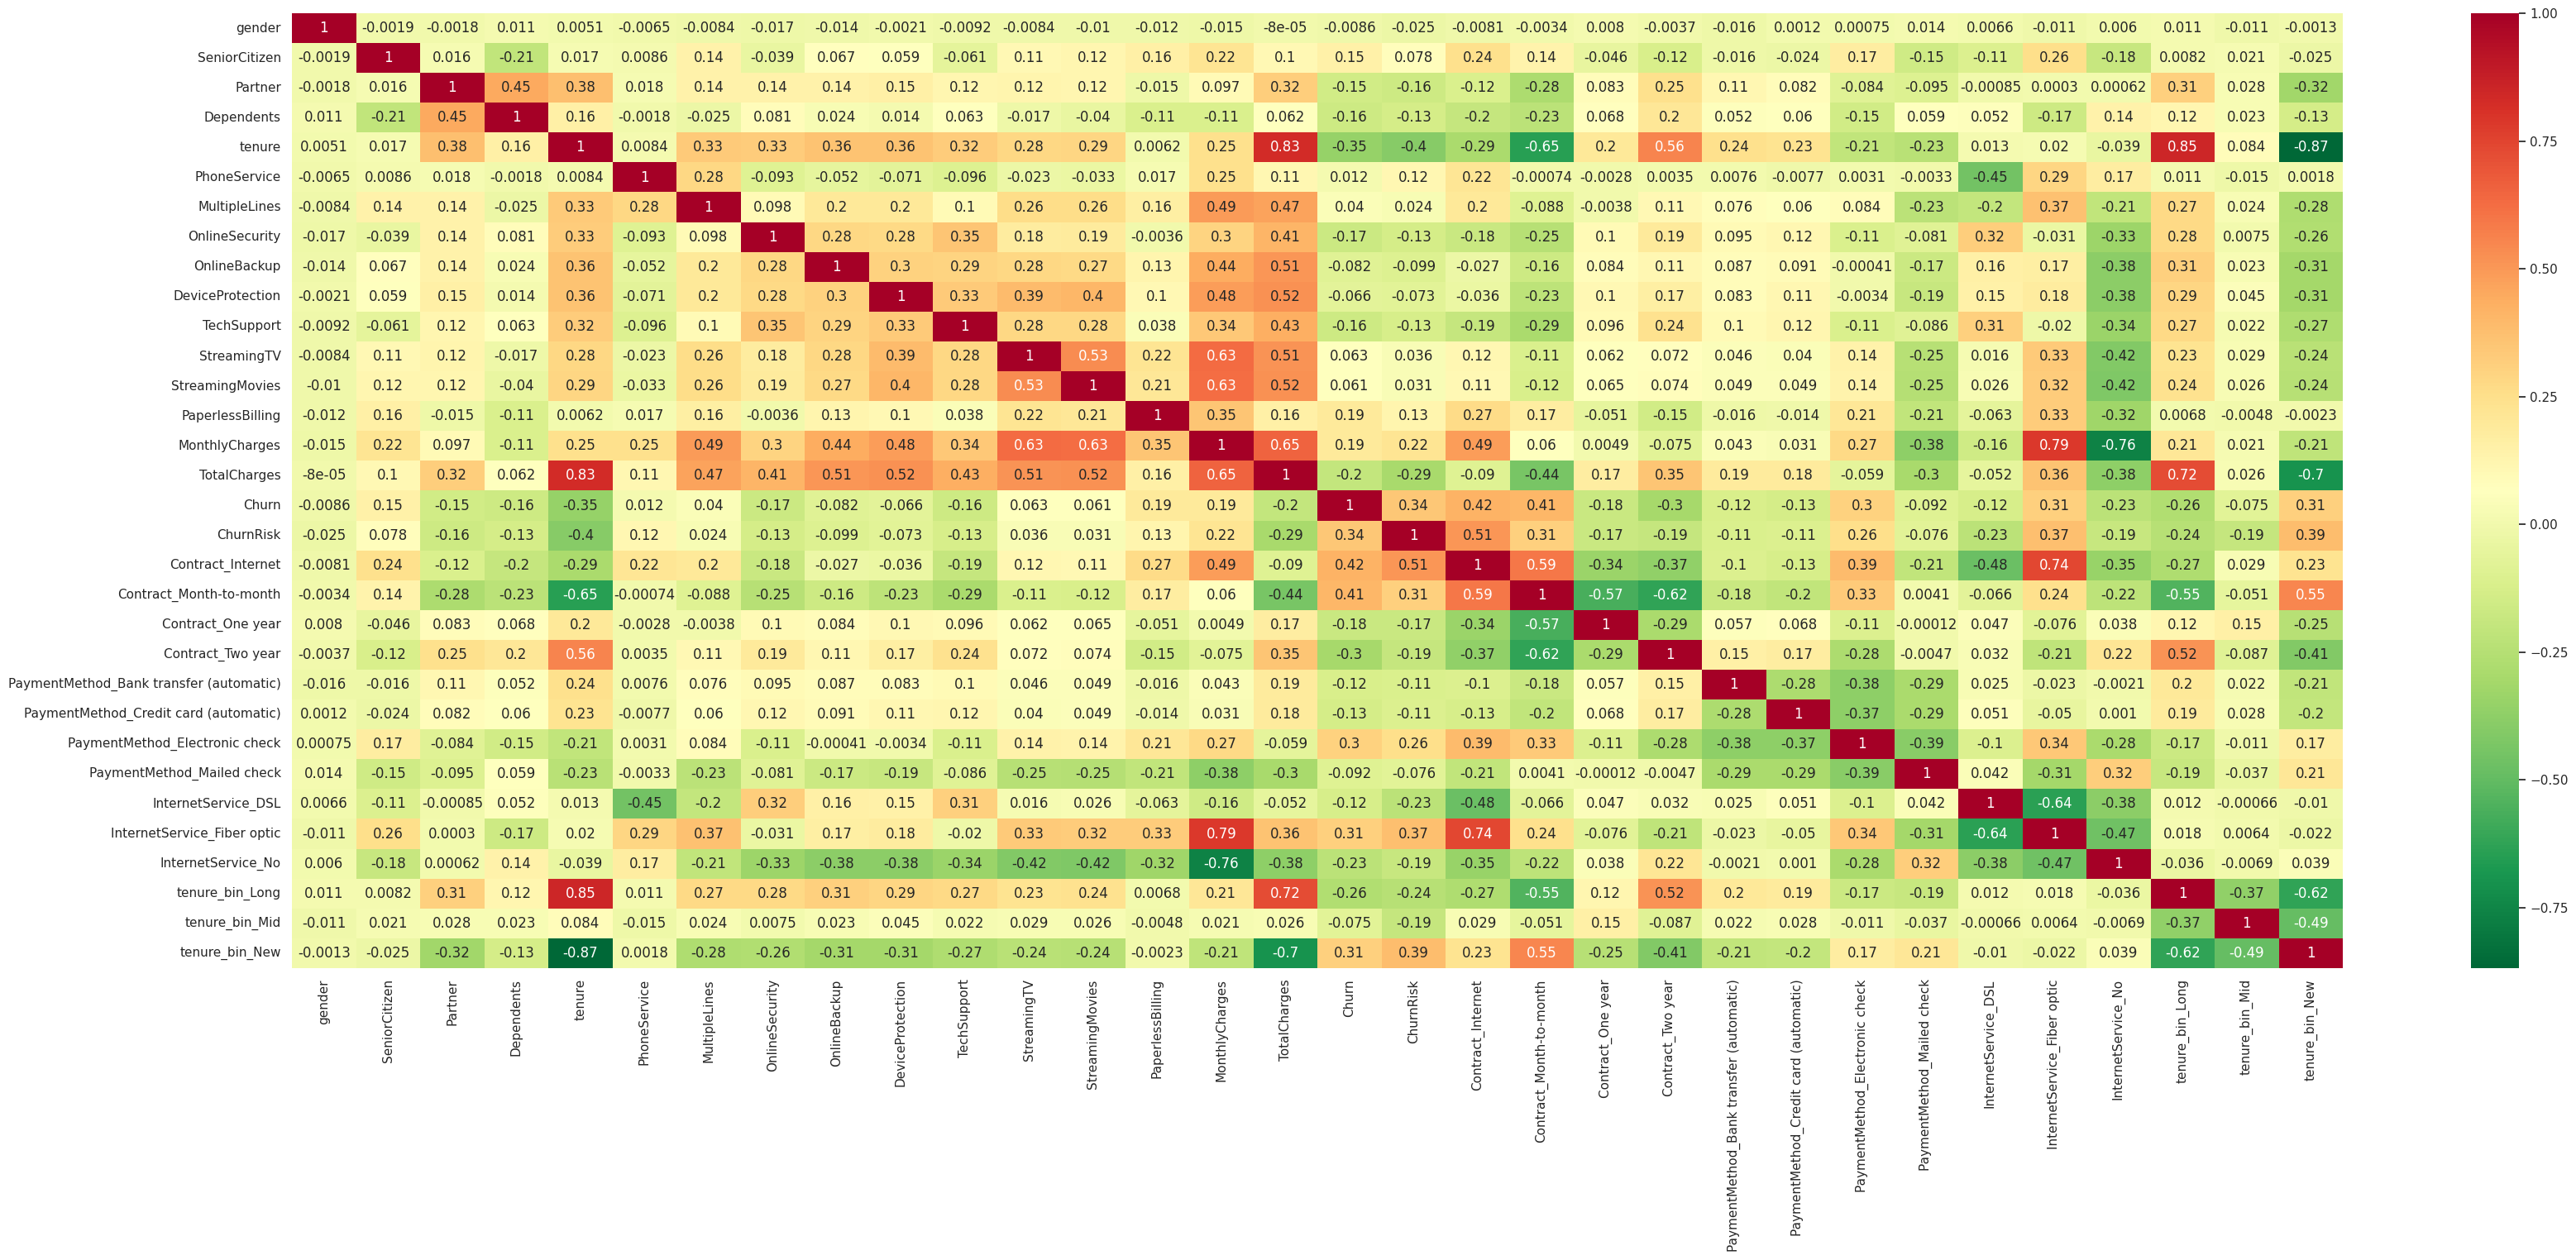

In [ ]:
plt.figure(figsize = (40,15))
sns.heatmap(df.corr(),cmap = 'RdYlGn_r',annot = True)

In [ ]:
cat_new=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
         'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No','tenure_bin_Long', 'tenure_bin_Mid',
       'tenure_bin_New','ChurnRisk', 'Contract_Internet']

**Chi Squared Score**

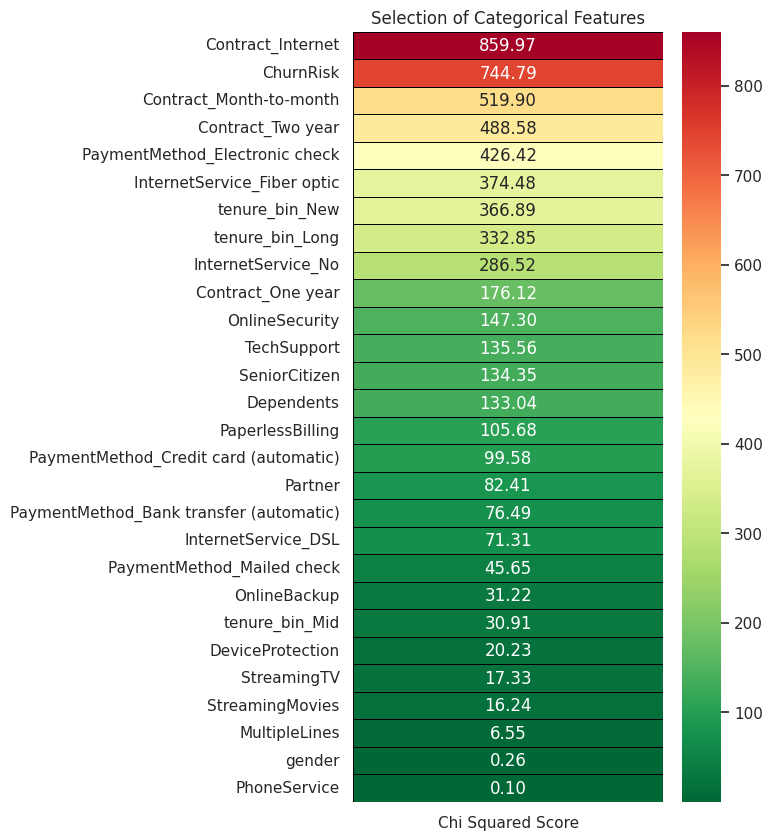

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
features = df.loc[:,cat_new]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(cat_new),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,10))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'RdYlGn_r',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

**P Value**

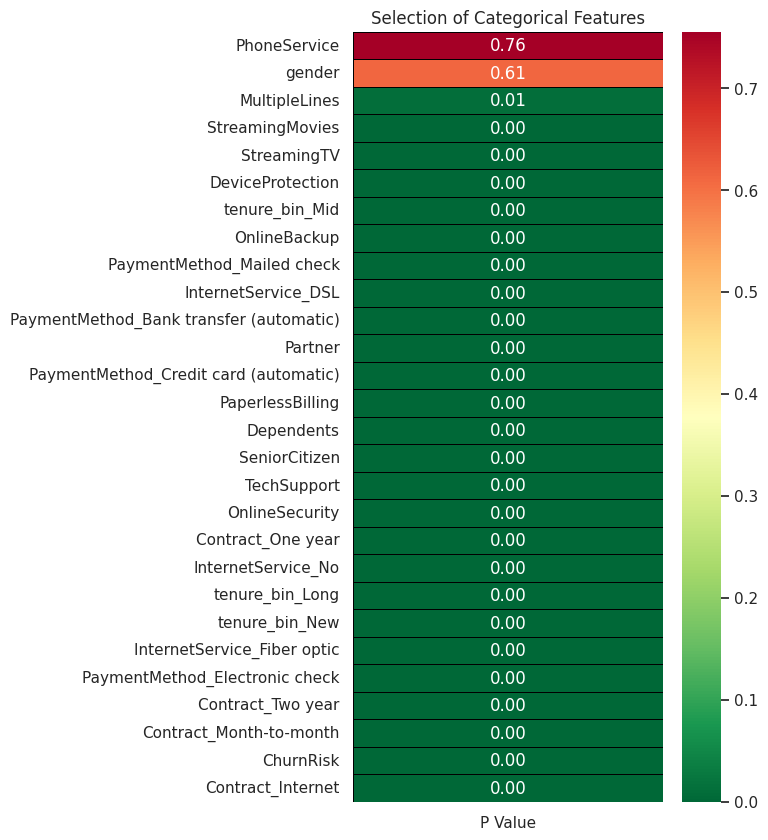

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
features = df.loc[:,cat_new]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.pvalues_,index = list(cat_new),columns = ['P Value'])

plt.subplots(figsize = (5,10))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'P Value'),annot = True,cmap = 'RdYlGn_r',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

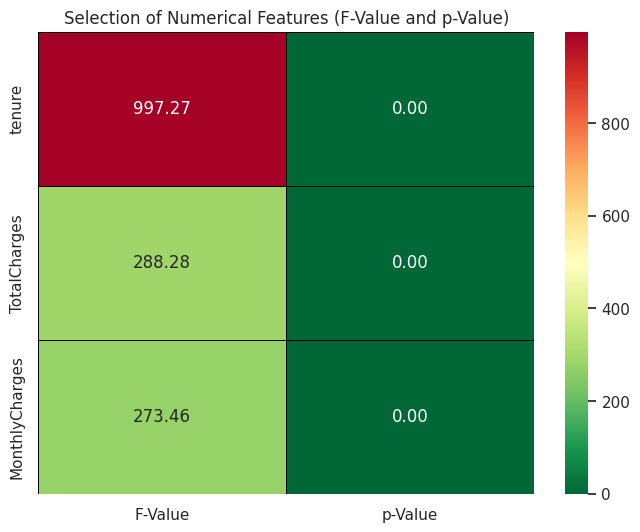

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target
features = df.loc[:, num_cols]
target = df.loc[:, 'Churn']

# Apply SelectKBest with f_classif as the score function
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Create a DataFrame for the F-scores and p-values
featureScores = pd.DataFrame({
    'F-Value': fit.scores_,
    'p-Value': fit.pvalues_
}, index=list(features.columns))

# Sort the DataFrame by F-Value
sorted_features = featureScores.sort_values(ascending=False, by='F-Value')

# Plot the heatmap
plt.subplots(figsize=(8, 6))
sns.heatmap(sorted_features, annot=True, cmap='RdYlGn_r', linewidths=0.4, linecolor='black', fmt='.2f')

# Add plot title
plt.title('Selection of Numerical Features (F-Value and p-Value)')
plt.show()

# **10. Feature Reduction**

**Mutual Information Score**

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Churn' is the target variable and df1_tenure is your preprocessed DataFrame
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (not strictly necessary for mutual_info_classif)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate mutual information between each feature and the target variable
mi_scores = mutual_info_classif(X_train_scaled, y_train)

# Create a DataFrame to display the feature names and their mutual information scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': mi_scores})

# Sort the DataFrame by score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Mutual_Information_Score', ascending=False)

# Print all feature scores
print("All Feature Mutual Information Scores:")
print(feature_scores_df)

# Select the features with non-zero mutual information scores
selected_features = feature_scores_df[feature_scores_df['Mutual_Information_Score'] > 0]['Feature'].tolist()

# Print the selected features
print("\nSelected features:", selected_features)


All Feature Mutual Information Scores:
                                    Feature  Mutual_Information_Score
18                  Contract_Month-to-month                  0.088567
17                        Contract_Internet                  0.080758
4                                    tenure                  0.069801
16                                ChurnRisk                  0.058658
26              InternetService_Fiber optic                  0.055960
20                        Contract_Two year                  0.050553
30                           tenure_bin_New                  0.045611
28                          tenure_bin_Long                  0.045152
15                             TotalCharges                  0.045112
14                           MonthlyCharges                  0.043989
23           PaymentMethod_Electronic check                  0.042943
27                       InternetService_No                  0.022601
13                         PaperlessBilling        

**Lasso Coefficient (L1 Regularization)**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'Churn' is the target variable and df1_tenure is your preprocessed DataFrame
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for Lasso, which is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso model (alpha controls the regularization strength)
lasso = Lasso(alpha=0.01)

# Fit the Lasso model to the training data
lasso.fit(X_train_scaled, y_train)

# Get the coefficients of the features
lasso_coefficients = lasso.coef_

# Create a DataFrame to display the feature names and their Lasso coefficients
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Lasso_Coefficient': lasso_coefficients})

# Sort the DataFrame by coefficient magnitude in descending order
feature_scores_df = feature_scores_df.reindex(feature_scores_df['Lasso_Coefficient'].abs().sort_values(ascending=False).index)

# Print all feature coefficients
print("All Feature Coefficients:")
print(feature_scores_df)

# Select the features with non-zero coefficients
selected_features = feature_scores_df[feature_scores_df['Lasso_Coefficient'] != 0]['Feature'].tolist()

# Print the selected features
print("\nSelected features:", selected_features)

All Feature Coefficients:
                                    Feature  Lasso_Coefficient
4                                    tenure          -0.069636
16                                ChurnRisk           0.045987
18                  Contract_Month-to-month           0.043430
27                       InternetService_No          -0.039935
17                        Contract_Internet           0.038776
23           PaymentMethod_Electronic check           0.033652
7                            OnlineSecurity          -0.024634
26              InternetService_Fiber optic           0.023408
13                         PaperlessBilling           0.016782
12                          StreamingMovies           0.013598
1                             SeniorCitizen           0.012659
10                              TechSupport          -0.012535
29                           tenure_bin_Mid          -0.006281
8                              OnlineBackup          -0.004627
3                            

**Information Gain**

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Churn' is the target variable and df1_tenure is your preprocessed DataFrame
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional, typically not necessary for tree models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate Information Gain (Mutual Information) for each feature
mutual_info = mutual_info_classif(X_train_scaled, y_train)

# Create a DataFrame to display the feature names and their Information Gain scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': mutual_info})

# Sort the DataFrame by Information Gain in descending order
feature_importance_df = feature_importance_df.sort_values(by='Information Gain', ascending=False)

# Print all feature Information Gain scores
print("Feature Information Gain (Mutual Information):")
print(feature_importance_df)

# Select the top k features (for example, top 10)
num_features_to_select = 10  # Change this to select a different number of features
selected_features = feature_importance_df.head(num_features_to_select)['Feature'].tolist()

# Print the selected features
print("\nSelected features:", selected_features)


Feature Information Gain (Mutual Information):
                                    Feature  Information Gain
18                  Contract_Month-to-month          0.092346
4                                    tenure          0.078148
17                        Contract_Internet          0.070164
20                        Contract_Two year          0.068217
26              InternetService_Fiber optic          0.057052
16                                ChurnRisk          0.056882
30                           tenure_bin_New          0.055724
15                             TotalCharges          0.045693
23           PaymentMethod_Electronic check          0.042674
14                           MonthlyCharges          0.042549
28                          tenure_bin_Long          0.039096
27                       InternetService_No          0.038350
10                              TechSupport          0.025969
25                      InternetService_DSL          0.019447
7                      

In [ ]:
# List of final selected features
final_features = [
    'SeniorCitizen',
    'Dependents',
    'Contract_Month-to-month',
    'Contract_One year',
    'Contract_Two year',
    'tenure_bin_New',
    'tenure_bin_Mid',
    'tenure_bin_Long',
    'InternetService_Fiber optic',
    'OnlineSecurity',
    'TechSupport',
    'PaymentMethod_Electronic check',
    'PaperlessBilling',
    'MonthlyCharges',
    'TotalCharges',
    'Churn']

# Create a new DataFrame with the selected features
df_final = df[final_features]

# Display the new DataFrame
df_final.head()


,SeniorCitizen,Dependents,Contract_Month-to-month,Contract_One year,Contract_Two year,tenure_bin_New,tenure_bin_Mid,tenure_bin_Long,InternetService_Fiber optic,OnlineSecurity,TechSupport,PaymentMethod_Electronic check,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0,1,0.115423,0.003437,0
1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0.0,0,0.385075,0.217564,0
2,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.0,1,0.354229,0.012453,1
3,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,0,0.239303,0.211951,0
4,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1.0,1,0.521891,0.017462,1


**Final Features**

*     SeniorCitizen
*     Dependents
*     Contract_Month-to-month
*     Contract_One year
*     Contract_Two year
*     tenure_bin_New
*     tenure_bin_Mid
*     tenure_bin_Long
*     InternetService_Fiber optic
*     OnlineSecurity
*     TechSupport
*     PaymentMethod_Electronic check
*     PaperlessBilling
*     MonthlyCharges
*     TotalCharges
*     Churn

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   7043 non-null   int64  
 1   Dependents                      7043 non-null   int64  
 2   Contract_Month-to-month         7043 non-null   float64
 3   Contract_One year               7043 non-null   float64
 4   Contract_Two year               7043 non-null   float64
 5   tenure_bin_New                  7043 non-null   float64
 6   tenure_bin_Mid                  7043 non-null   float64
 7   tenure_bin_Long                 7043 non-null   float64
 8   InternetService_Fiber optic     7043 non-null   float64
 9   OnlineSecurity                  7043 non-null   int64  
 10  TechSupport                     7043 non-null   int64  
 11  PaymentMethod_Electronic check  7043 non-null   float64
 12  PaperlessBilling                70

# **11. UpSampling by SMOTE**

**Upsampling the minority class (churn) to address class imbalance.**

In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print(y_train_smote.value_counts())

# Proceed with modeling using X_train_smote, y_train_smote

Churn
0    3635
1    3635
Name: count, dtype: int64


In [ ]:
X_train_smote.shape, y_train_smote.shape, X_test.shape, y_test.shape

((7270, 15), (7270,), (2113, 15), (2113,))

# **12. Machine Learning Algorithms**

# **12. 1. AdaBoost Classifier**

In [ ]:
# prompt: convert above code to Ada Boost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


# Initialize the AdaBoost Classifier
model_ada = AdaBoostClassifier(n_estimators=200, random_state=42)

# Train the model with the training data
model_ada.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model_ada.predict(X_test)


# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_ada, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Accuracy: 0.76

Class 0 Metrics:
Precision: 0.92
Recall: 0.73
F1-Score: 0.81

Class 1 Metrics:
Precision: 0.53
Recall: 0.82
F1-Score: 0.65

Confusion Matrix:
[[1126  413]
 [ 102  472]]

Cross-Validation Accuracy Score: 0.7681 ± 0.0083


# **12. 2. Gradient Boosting Classifier**

In [ ]:
# prompt: convert above code to Gradient boost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Train the model with the training data
model_gb.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model_gb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_gb, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')



Accuracy: 0.75

Class 0 Metrics:
Precision: 0.90
Recall: 0.74
F1-Score: 0.81

Class 1 Metrics:
Precision: 0.53
Recall: 0.79
F1-Score: 0.64

Confusion Matrix:
[[1141  398]
 [ 121  453]]

Cross-Validation Accuracy Score: 0.7796 ± 0.0116


# **12. 3. Logistic Regression**

In [ ]:
# prompt: convert above code to Gradient boost
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Gradient Boosting Classifier
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# Train the model with the training data
model_lr.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_lr, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')



Accuracy: 0.75

Class 0 Metrics:
Precision: 0.91
Recall: 0.73
F1-Score: 0.81

Class 1 Metrics:
Precision: 0.53
Recall: 0.80
F1-Score: 0.64

Confusion Matrix:
[[1129  410]
 [ 116  458]]

Cross-Validation Accuracy Score: 0.7541 ± 0.0070


# **12. 4. Random Forest Classifier**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the XGBoost Classifier
model_rfc = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=2)

# Train the model with the training data
model_rfc.fit(X_train_smote, y_train_smote)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_rfc, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Accuracy: 0.75

Class 0 Metrics:
Precision: 0.91
Recall: 0.73
F1-Score: 0.81

Class 1 Metrics:
Precision: 0.53
Recall: 0.80
F1-Score: 0.64

Confusion Matrix:
[[1129  410]
 [ 116  458]]

Cross-Validation Accuracy Score: 0.7424 ± 0.0051


# **12. 5. Decision Tree Classifier**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the XGBoost Classifier
model_dt = DecisionTreeClassifier(max_depth=3, random_state=2)

# Train the model with the training data
model_dt.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(model_dt, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')


Accuracy: 0.74

Class 0 Metrics:
Precision: 0.91
Recall: 0.71
F1-Score: 0.80

Class 1 Metrics:
Precision: 0.51
Recall: 0.82
F1-Score: 0.63

Confusion Matrix:
[[1090  449]
 [ 102  472]]

Cross-Validation Accuracy Score: 0.7453 ± 0.0064


# **12. 6. Stack of Previous Models**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the base models
estimators = [
    ('gb', model_gb),
    ('ada', model_ada),
    ('lr', model_lr),
    ('dt', model_dt),
    ('rfc', model_rfc)
]

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(stacking_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')



Accuracy: 0.76

Class 0 Metrics:
Precision: 0.91
Recall: 0.75
F1-Score: 0.82

Class 1 Metrics:
Precision: 0.54
Recall: 0.79
F1-Score: 0.64

Confusion Matrix:
[[1153  386]
 [ 119  455]]


# **12. 7. Voting Classifier of above 4 Algorithms**

In [ ]:

import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Create a voting classifier with the four models
voting_classifier = VotingClassifier(estimators=[
    ('gb', model_gb),
    ('ada', model_ada),
    ('lr', model_lr),
    ('dt', model_dt),
    ('rfc', model_rfc)
], voting='hard')  # 'hard' for majority vote

# Train the voting classifier
voting_classifier.fit(X_train_smote, y_train_smote)

# Make predictions with the voting classifier
y_pred = voting_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

# Manually compute precision, recall, and F1-score for each class
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the metrics for each class
print('\nClass 0 Metrics:')
print(f'Precision: {precision_0:.2f}')
print(f'Recall: {recall_0:.2f}')
print(f'F1-Score: {f1_0:.2f}')

print('\nClass 1 Metrics:')
print(f'Precision: {precision_1:.2f}')
print(f'Recall: {recall_1:.2f}')
print(f'F1-Score: {f1_1:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(voting_classifier, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f'\nCross-Validation Accuracy Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')